<p style="background-color:palevioletred;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>Random Forest Classification - Diabetes Dataset</b></p>

# <font color='palevioletred'> <b>Importing Libraries</b><font color='black'>  

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import missingno as msno
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf  

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='palevioletred'> <b>Loading Dataset</b><font color='black'>  

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
423,2,115,64,22,0,30.8,0.421,21,0
332,1,180,0,0,0,43.3,0.282,41,1
59,0,105,64,41,142,41.5,0.173,22,0
521,3,124,80,33,130,33.2,0.305,26,0
313,3,113,50,10,85,29.5,0.626,25,0


**About Dataset**

This dataset contains data from diabetes studies on Pima Native American women living in Arizona.

The dataset includes the following features:

   1. **Pregnancies:** Number of pregnancies.<br>
   2. **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test.<br>
   3. **Blood Pressure:** Blood pressure (mm Hg).<br>
   4. **Skin Thickness:** Triceps skinfold thickness (mm).<br>
   5. **Insulin:** 2-hour serum insulin (mu U/ml).<br>
   6. **BMI:** Body mass index (weight kg/(height m)^2).<br>
   7. **Diabetes Pedigree Function:** Diabetes pedigree function, a function that determines the likelihood of diabetes based on family history.<br>
   8. **Age:** Age (years).<br>
   9. **Outcome:** The class label (0 or 1) indicates whether the person has diabetes. 1 indicates that he has diabetes, 0 indicates that he does not have d

This dataset is widely used to train machine learning algorithms and for use in binary classification problems such as predicting diabetes. The dataset is used especially for data preprocessing, feature engineering and comparing the performance of classification algorithms.

Typical applications using the dataset include understanding which patient profiles are at risk for diabetes, determining which characteristics increase the likelihood of diabetes, and developing predictive models to help automatically diagnose diabetes.

It is important to note that the nature of the dataset may present challenges such as some features may be missing or it may have an unbalanced class distribution. Such challenges provide an opportunity to delve deeper into machine learning topics such as data cleaning, missing data imputation, handling imbalanced datasets, and model validation techniques.iabetes.<br>

# <font color='palevioletred'> <b>EDA</b><font color='black'>  

In [8]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

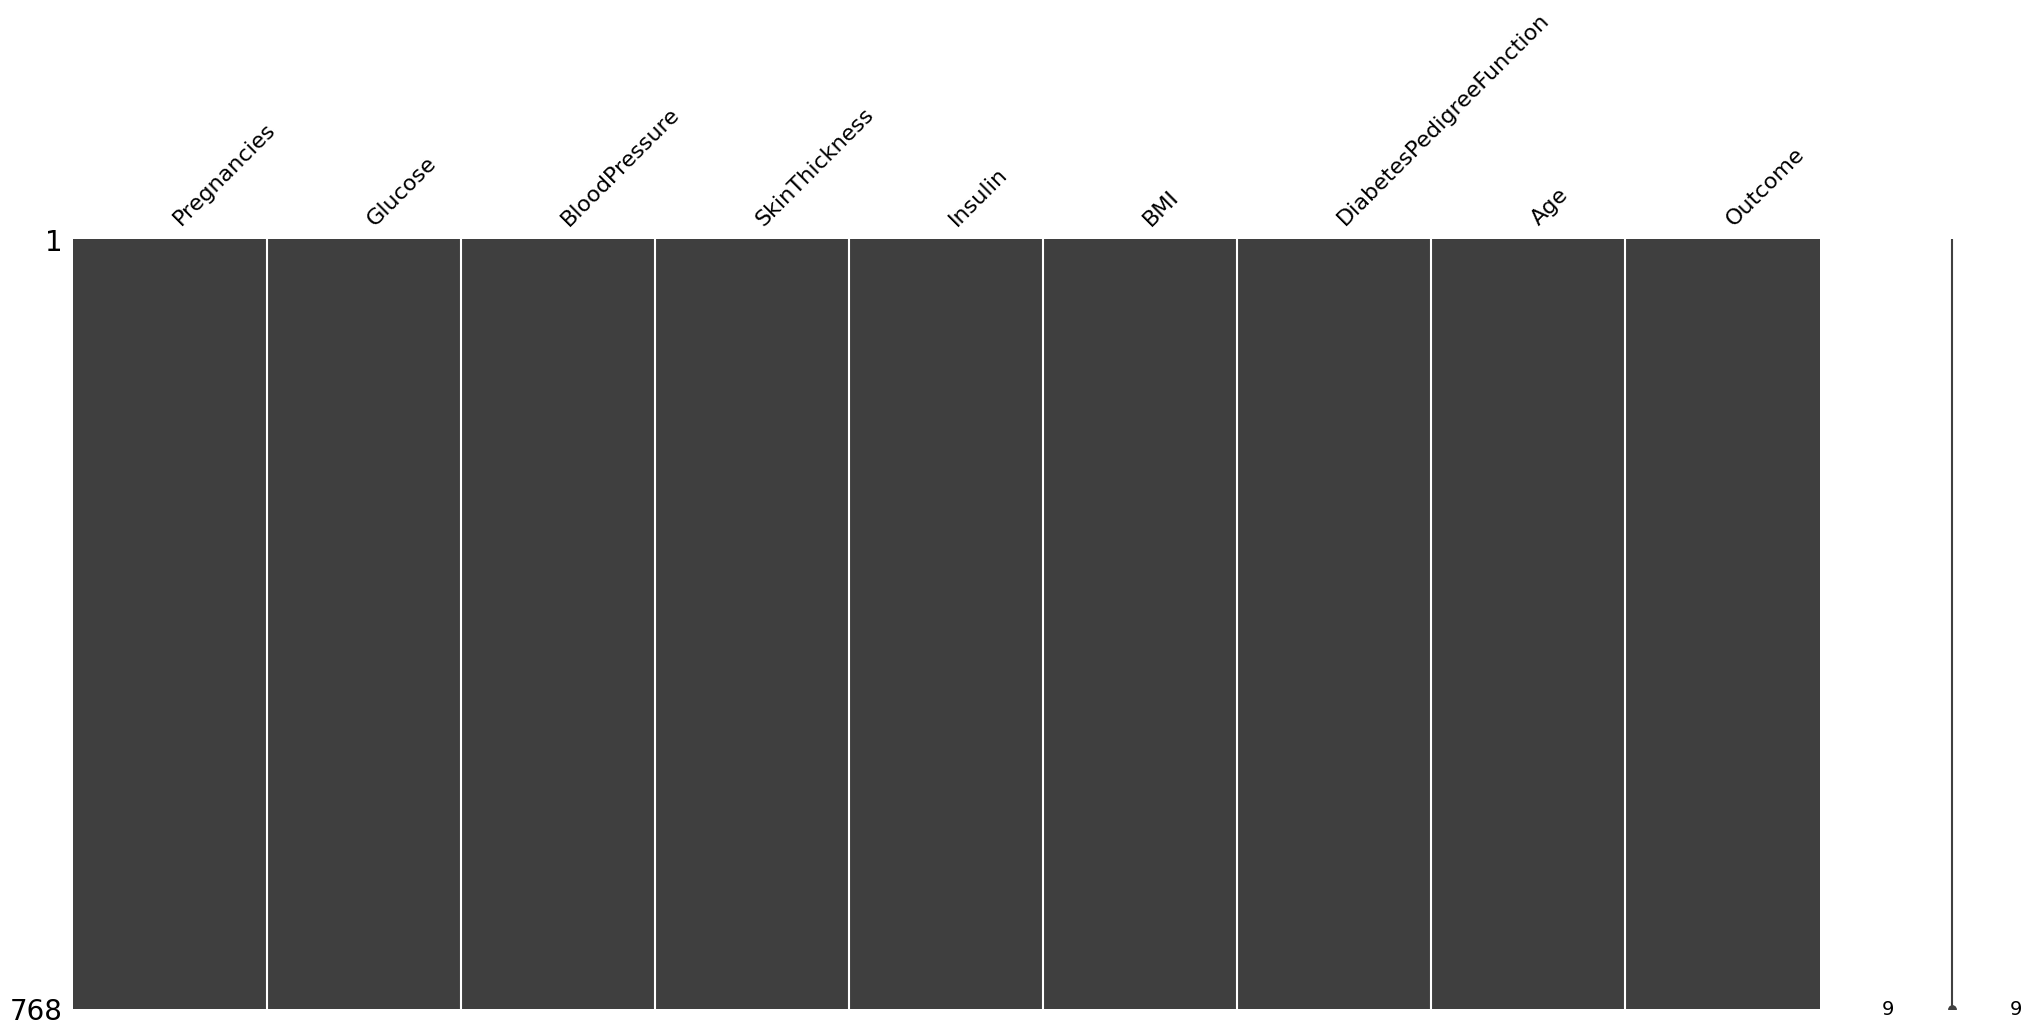

In [22]:
msno.matrix(df);

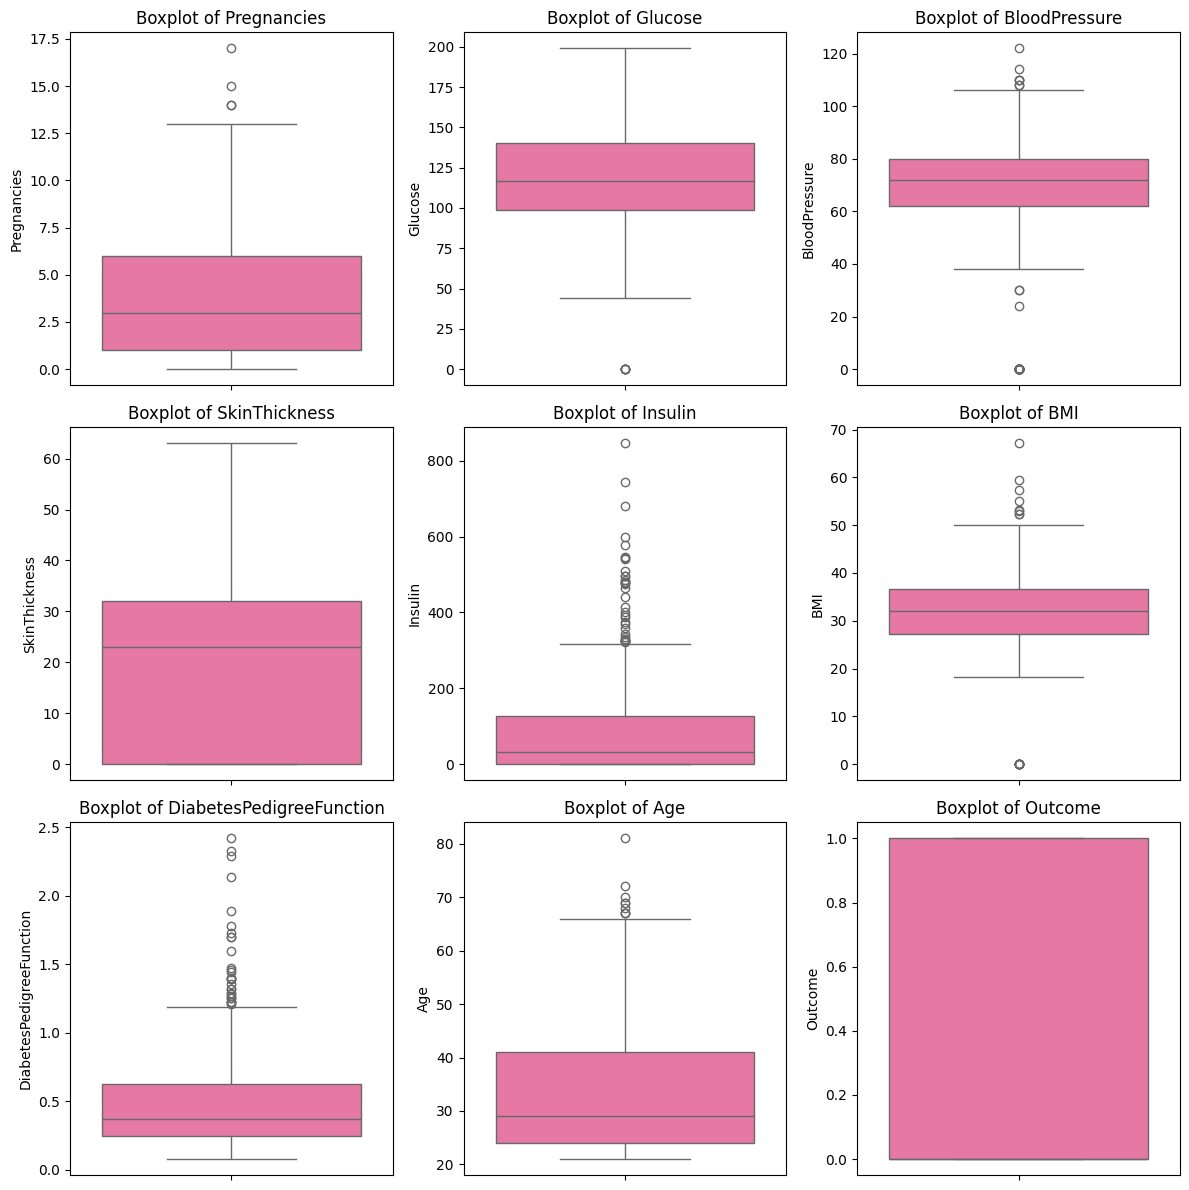

In [34]:
numeric_columns = df.select_dtypes(include="number").columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette='RdPu')
    axes[i].set_title(f"Boxplot of {col}")

for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

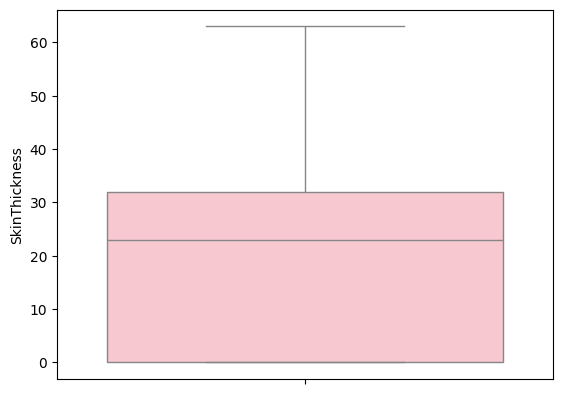

In [36]:
# Since the outliers in the skin thickness column are unusual, we take values ​​less than 70.
df = df[df.SkinThickness<70]
sns.boxplot(df.SkinThickness, color='pink');

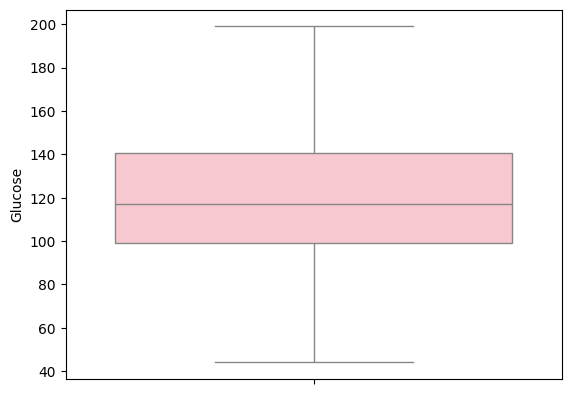

In [38]:
# Glucose value cannot be 0. That's why we take values ​​greater than 0.
df = df[df.Glucose>0]
sns.boxplot(df.Glucose, color='pink');

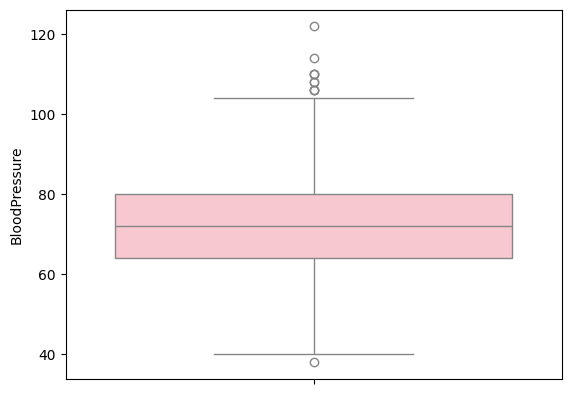

In [40]:
df = df[df.BloodPressure>35]
sns.boxplot(df.BloodPressure, color='pink');

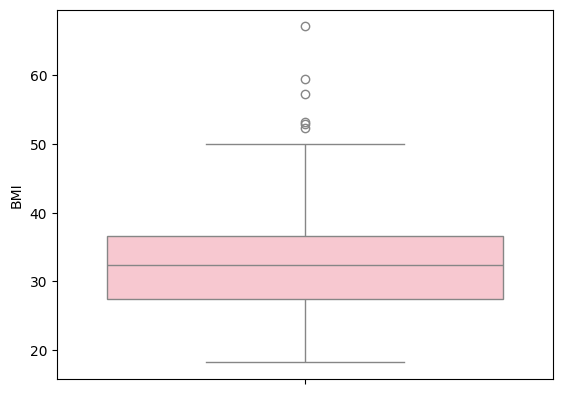

In [42]:
df = df[df.BMI>0]
sns.boxplot(df.BMI, color='pink');

In [44]:
df.shape

(720, 9)

In [48]:
df.Outcome.value_counts()

# this data is unbalanced data

Outcome
0    473
1    247
Name: count, dtype: int64

In [50]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64

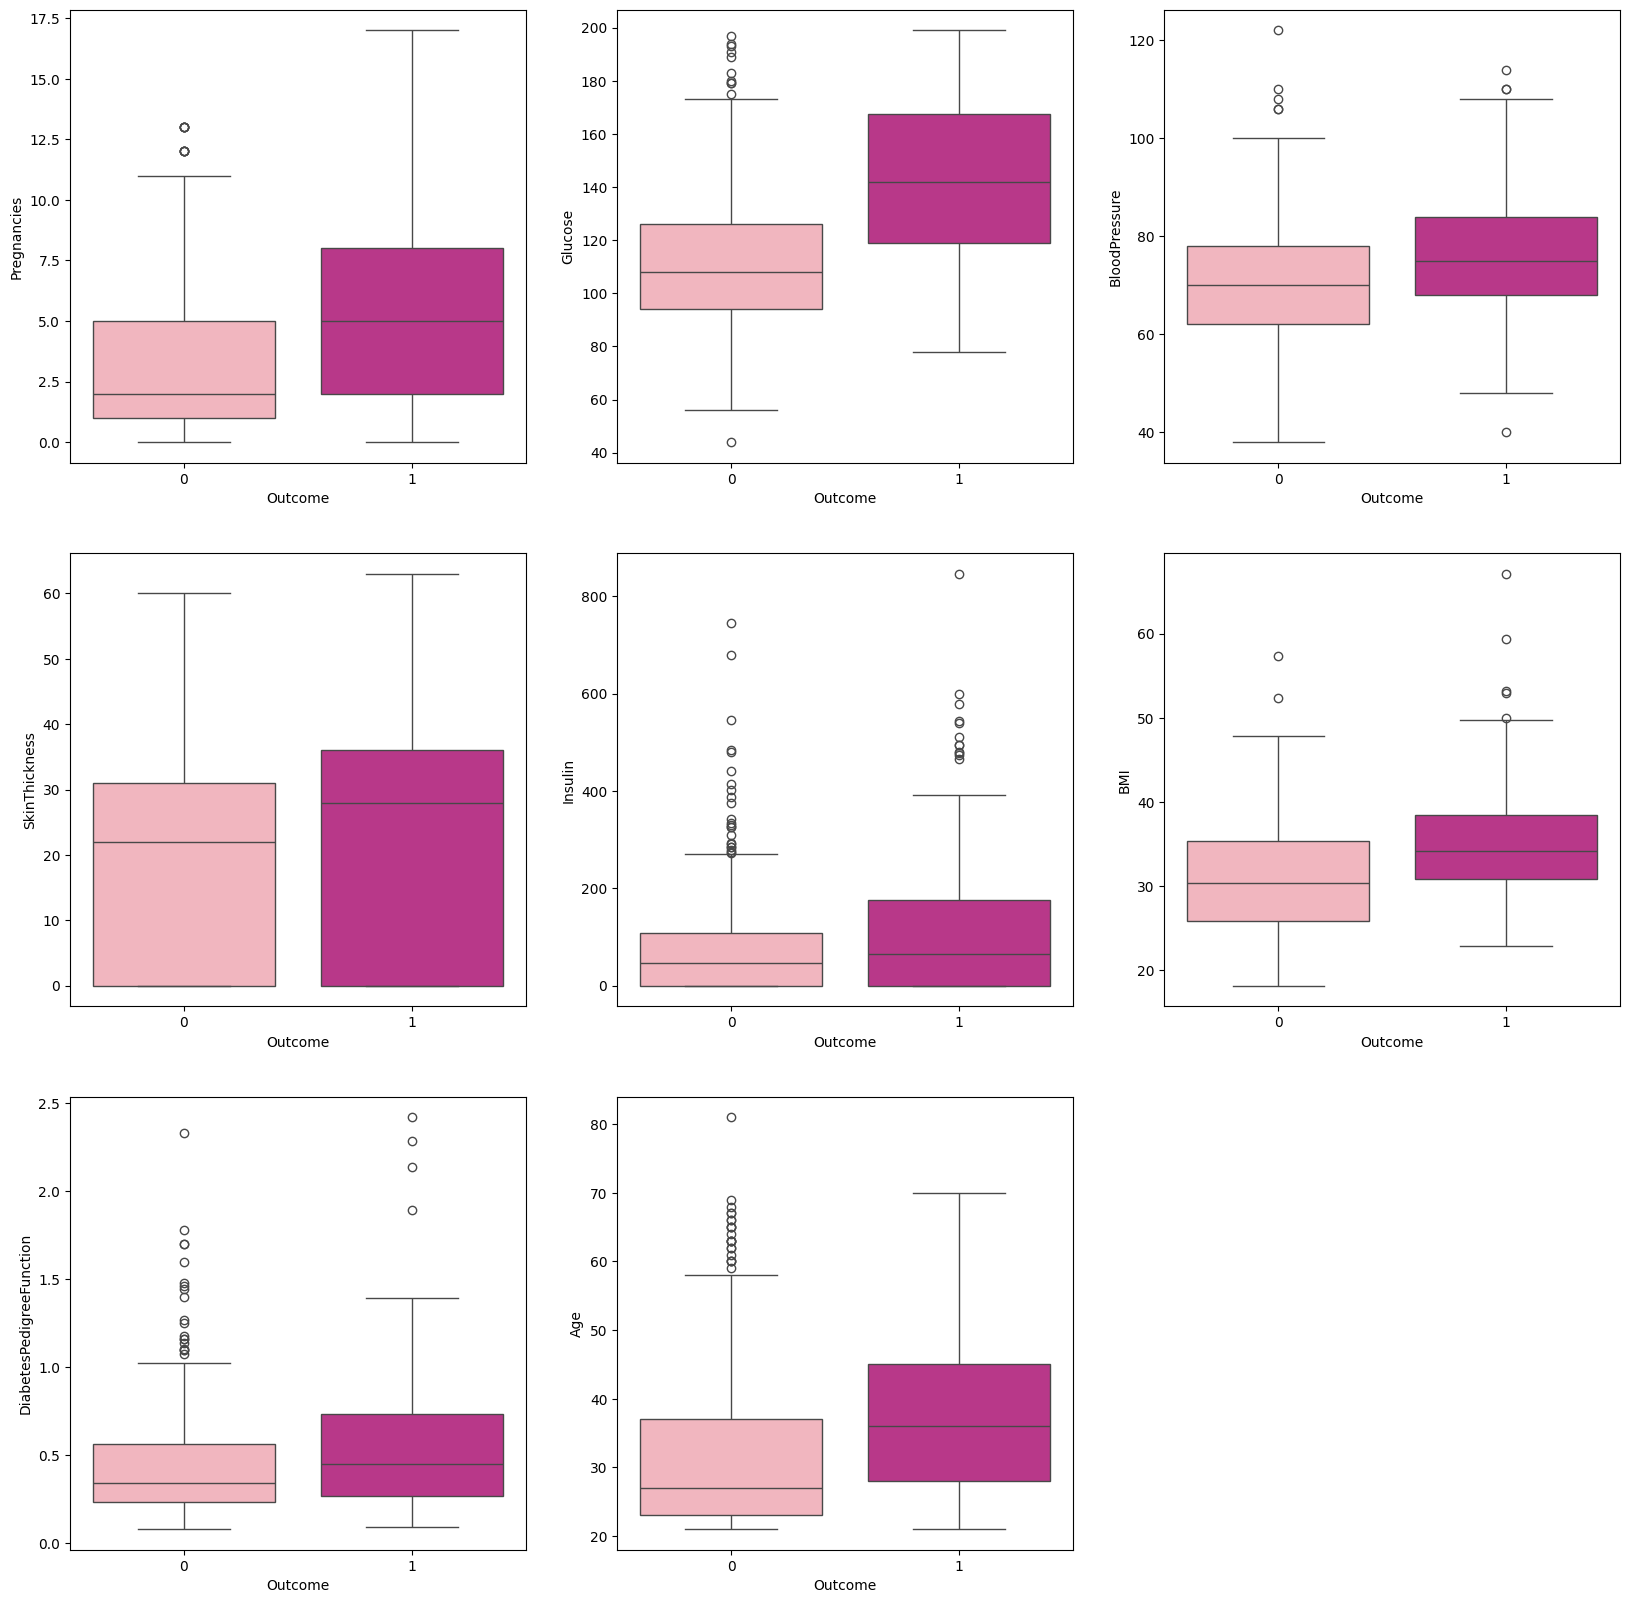

In [52]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df, palette='RdPu')
plt.show()

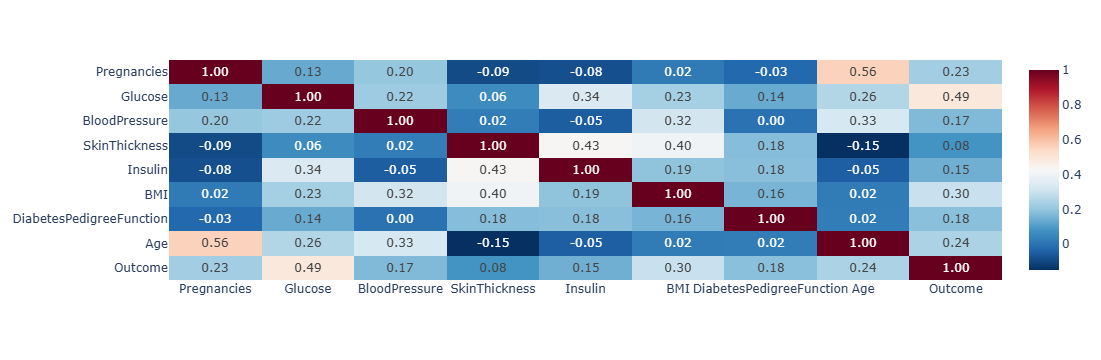

<Figure size 800x600 with 0 Axes>

In [56]:
plt.figure(figsize=(8,6))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

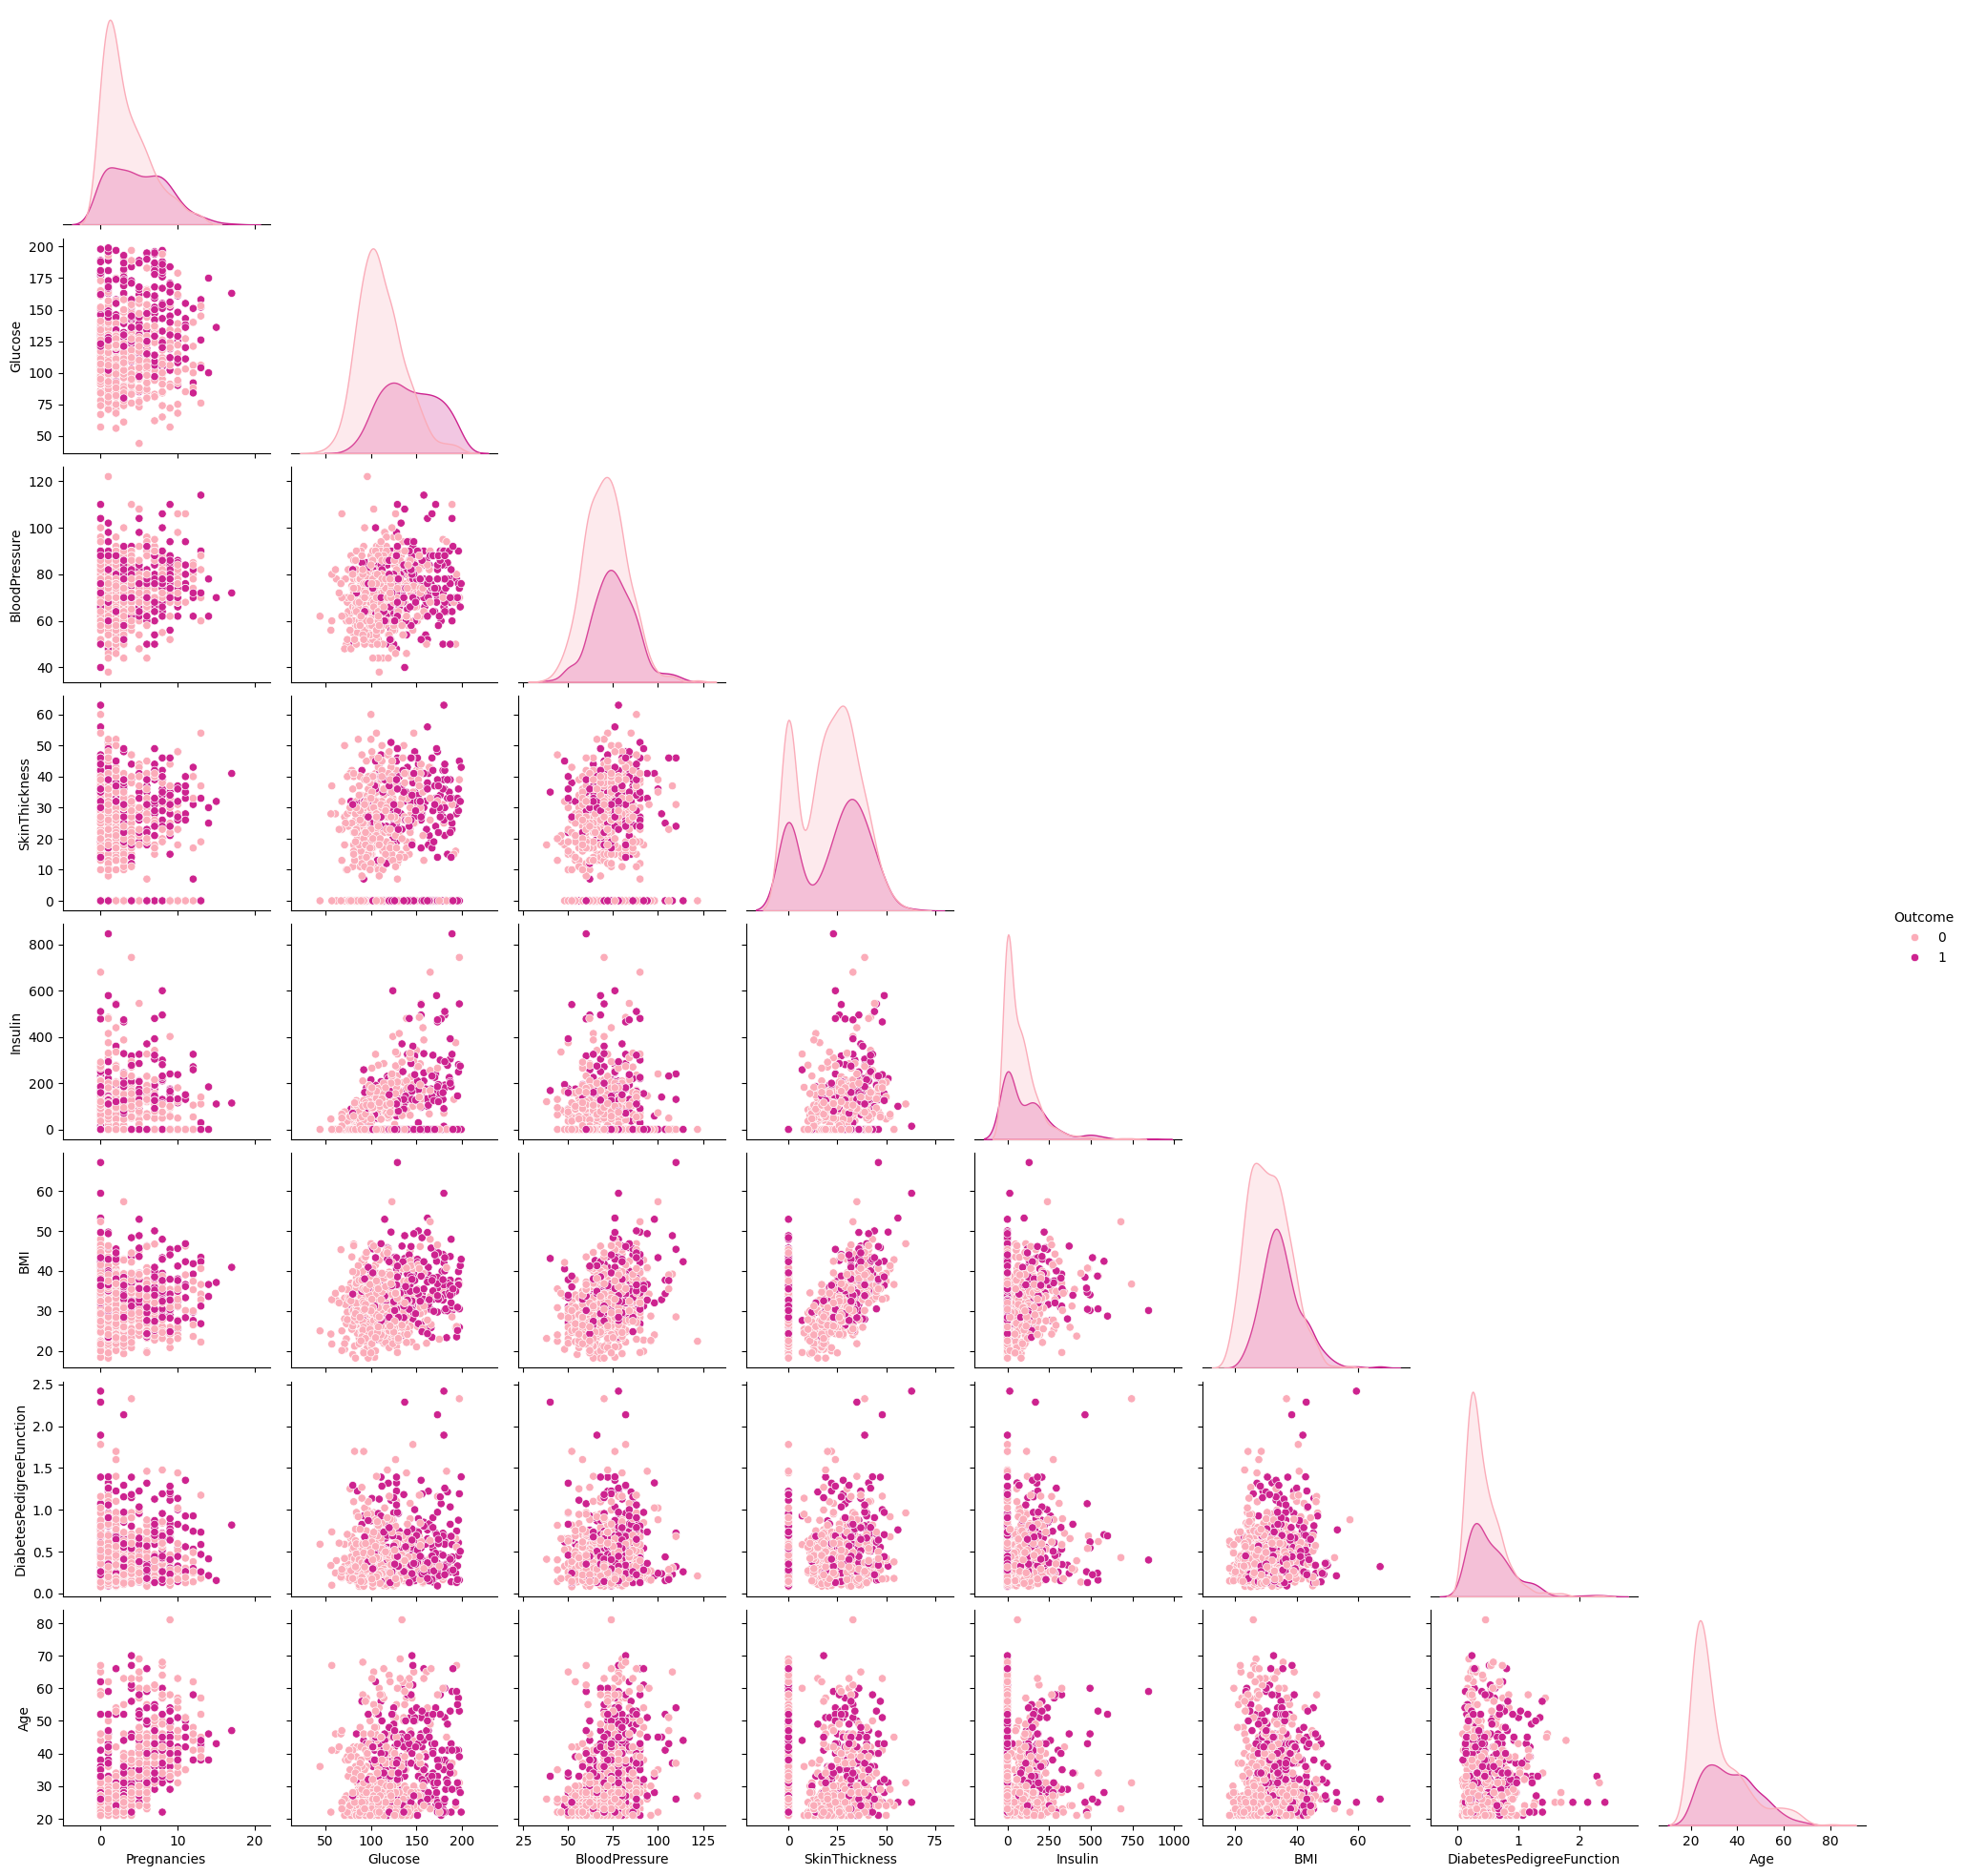

In [58]:
sns.pairplot(df, hue = "Outcome", corner=True, palette='RdPu');

# <font color='palevioletred'> <b>Defining X and y</b><font color='black'>  

In [60]:
X = df.drop(columns="Outcome")
y = df.Outcome

# <font color='palevioletred'> <b>Train-Test Split</b><font color='black'>  

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

# <font color='palevioletred'> <b>Modeling</b><font color='black'>  

In [68]:
operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(class_weight = "balanced", random_state=101))]

rf_model = Pipeline(steps=operations)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [72]:
y_pred = rf_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [74]:
y_pred_proba = rf_model.predict_proba(X_test)

In [76]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # Probability of belonging to class 1
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
498,7,195,70,33,145,25.1,0.163,55,1,0,0.42
558,11,103,68,40,0,46.2,0.126,42,0,0,0.41
169,3,111,90,12,78,28.4,0.495,29,0,0,0.17
568,4,154,72,29,126,31.3,0.338,37,0,1,0.61
72,13,126,90,0,0,43.4,0.583,42,1,0,0.45
392,1,131,64,14,415,23.7,0.389,21,0,0,0.04
27,1,97,66,15,140,23.2,0.487,22,0,0,0.02
394,4,158,78,0,0,32.9,0.803,31,1,1,0.81
90,1,80,55,0,0,19.1,0.258,21,0,0,0.02
179,5,130,82,0,0,39.1,0.956,37,1,1,0.51


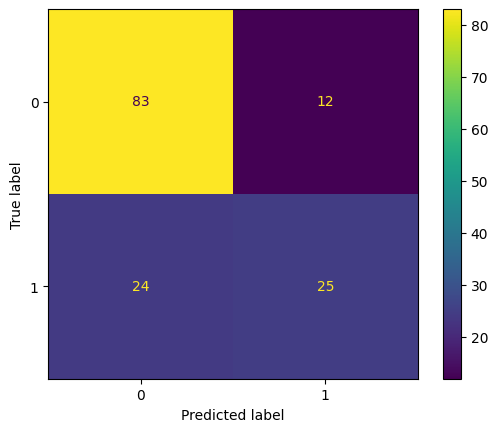

In [78]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test);

In [80]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [82]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[83 12]
 [24 25]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        95
           1       0.68      0.51      0.58        49

    accuracy                           0.75       144
   macro avg       0.73      0.69      0.70       144
weighted avg       0.74      0.75      0.74       144


Train_Set
[[378   0]
 [  0 198]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       378
           1       1.00      1.00      1.00       198

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



## <font color='pink'> <b>Cross Validation</b><font color='black'>  

In [84]:
operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(class_weight = "balanced", random_state=101))]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'], # Maximizes the scores of class 1.
                        cv = cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_precision     0.707508
train_precision    1.000000
test_recall        0.590263
train_recall       1.000000
test_f1            0.631876
train_f1           1.000000
test_accuracy      0.770841
train_accuracy     1.000000
dtype: float64

## <font color='pink'> <b>Cross Validate for 0 Class</b><font color='black'>  

In [90]:
f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(class_weight = "balanced", random_state=101))]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_0     0.807339
train_precision_0    1.000000
test_recall_0        0.865078
train_recall_0       1.000000
test_f1_0            0.831383
train_f1_0           1.000000
dtype: float64

## <font color='pink'> <b>GridSearchCV</b><font color='black'>  

In [92]:
rf_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('RF_model',
   RandomForestClassifier(class_weight='balanced', random_state=101))],
 'verbose': False,
 'scaler': StandardScaler(),
 'RF_model': RandomForestClassifier(class_weight='balanced', random_state=101),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'RF_model__bootstrap': True,
 'RF_model__ccp_alpha': 0.0,
 'RF_model__class_weight': 'balanced',
 'RF_model__criterion': 'gini',
 'RF_model__max_depth': None,
 'RF_model__max_features': 'sqrt',
 'RF_model__max_leaf_nodes': None,
 'RF_model__max_samples': None,
 'RF_model__min_impurity_decrease': 0.0,
 'RF_model__min_samples_leaf': 1,
 'RF_model__min_samples_split': 2,
 'RF_model__min_weight_fraction_leaf': 0.0,
 'RF_model__monotonic_cst': None,
 'RF_model__n_estimators': 100,
 'RF_model__n_jobs': None,
 'RF_model__oob_score': False,
 'RF_model__random_state': 101,
 'RF_model__verbose': 0,
 'RF_model__warm_start': False}

In [94]:
param_grid = {'RF_model__n_estimators':[64, 128, 200],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3, 4],
             'RF_model__min_samples_leaf': [2, 3, 4],
             'RF_model__max_samples':[0.8, 1]}

In [96]:
operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(class_weight = "balanced", random_state=101))]

model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring = "recall", 
                             n_jobs = -1)
rf_grid_model.fit(X_train, y_train)

# class_weight="balanced" was insufficient so it was weighted 1 to 4.

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3, 4],
                         'RF_model__max_features': [2, 4, 'sqrt'],
                         'RF_model__max_samples': [0.8, 1],
                         'RF_model__min_samples_leaf': [2, 3, 4],
                         'RF_model__min_samples_split': [2, 3, 4],
                         'RF_model__n_estimators': [64, 128, 200]},
             scoring='recall')

In [98]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 2,
 'RF_model__max_samples': 0.8,
 'RF_model__min_samples_leaf': 4,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 64}

In [100]:
rf_grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=4, n_estimators=64,
                                        random_state=101))])

In [102]:
rf_grid_model.best_score_

0.7680769230769231

In [104]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[71 24]
 [15 34]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.78        95
           1       0.59      0.69      0.64        49

    accuracy                           0.73       144
   macro avg       0.71      0.72      0.71       144
weighted avg       0.74      0.73      0.73       144


Train_Set
[[308  70]
 [ 40 158]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       378
           1       0.69      0.80      0.74       198

    accuracy                           0.81       576
   macro avg       0.79      0.81      0.80       576
weighted avg       0.82      0.81      0.81       576



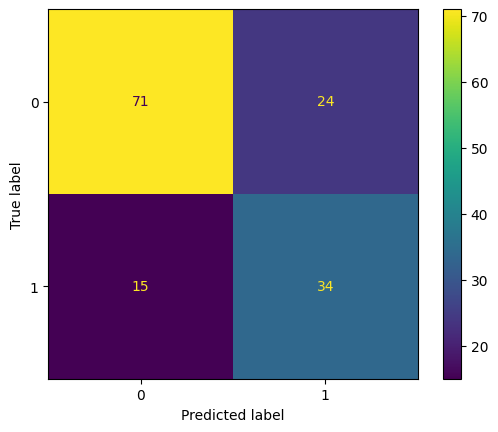

In [106]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test);

## <font color='pink'> <b>ROC (Receiver Operating Curve) | PRC (Presicion Recall Curve) | AUC (Area Under Curve)</b><font color='black'>  

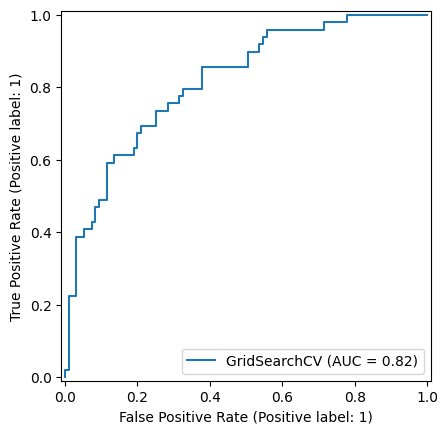

In [112]:
# ROC
RocCurveDisplay.from_estimator(rf_grid_model, X_test, y_test);

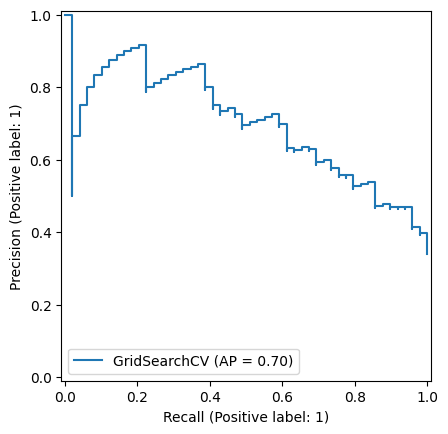

In [114]:
# PRC
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test, y_test);

Normally, in projects to be carried out, the final model is decided after the project evaluation metrics are improved. Since the purpose of this notebook is to learn and reinforce ML models, we will leave it here for now and move on to the final model part.

# <font color='palevioletred'> <b>Final Model</b><font color='black'>  

In [116]:
rf_grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=4, n_estimators=64,
                                        random_state=101))])

In [118]:
operations = [("scaler", StandardScaler()), ("RF_model", RandomForestClassifier(class_weight='balanced', 
                                                                                max_depth=2, 
                                                                                max_features=2,
                                                                                max_samples=0.8, 
                                                                                min_samples_leaf=4, 
                                                                                n_estimators=64,
                                                                                random_state=101))]
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=4, n_estimators=64,
                                        random_state=101))])

In [120]:
import pickle

In [122]:
pickle.dump(final_model, open("final_model", "wb"))

# <font color='palevioletred'> <b>Prediction</b><font color='black'>  

In [124]:
new_model = pickle.load(open("final_model", "rb"))

In [126]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,100,75,30,80,25,0.4,30
1,4,110,80,25,120,35,0.5,40
2,5,120,70,20,130,30,0.6,35


In [128]:
predictions = new_model.predict(sample)
predictions

array([0, 1, 1], dtype=int64)

In [130]:
predictions_proba = new_model.predict_proba(sample)
predictions_proba

array([[0.73167003, 0.26832997],
       [0.47242575, 0.52757425],
       [0.41783821, 0.58216179]])

In [132]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred
0,3,100,75,30,80,25,0.4,30,0.268330,0
1,4,110,80,25,120,35,0.5,40,0.527574,1
2,5,120,70,20,130,30,0.6,35,0.582162,1


<p style="background-color:palevioletred;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>